In [5]:
import clients.tda as tda
import pandas as pd
from plotnine import *


def parse_historical_response(result, symbol):
    if result.status_code == 200:
        response_body = result.json()

        history = pd.DataFrame(response_body["candles"])
        return history


client = tda.TDAClient("SZKIIQY0STUI4WGFAQCVLOBJANB61M0H")
client.get_access_token()

symb = "SPY"
quote_results = client.get_quote_history(symb, startdate="2019-01-01")

spy_history = parse_historical_response(quote_results, symb)
spy_history["datetime"] = pd.to_datetime(spy_history["datetime"], unit="ms")
print(spy_history)

       open      high     low   close     volume            datetime
0    249.56  250.1900  247.47  249.92  144299370 2018-12-31 06:00:00
1    245.98  251.2100  245.95  250.18  126925199 2019-01-02 06:00:00
2    248.23  248.5700  243.67  244.21  144140690 2019-01-03 06:00:00
3    247.59  253.1100  247.17  252.39  142628830 2019-01-04 06:00:00
4    252.69  255.9500  251.69  254.38  103139100 2019-01-07 06:00:00
..      ...       ...     ...     ...        ...                 ...
308  228.19  229.6833  218.26  222.95  326025169 2020-03-23 05:00:00
309  234.42  244.1000  233.80  243.15  235494475 2020-03-24 05:00:00
310  244.87  256.3500  239.75  246.79  299430255 2020-03-25 05:00:00
311  249.52  262.8000  249.05  261.20  257632816 2020-03-26 05:00:00
312  253.27  260.8100  251.05  253.42  224341217 2020-03-27 05:00:00

[313 rows x 6 columns]


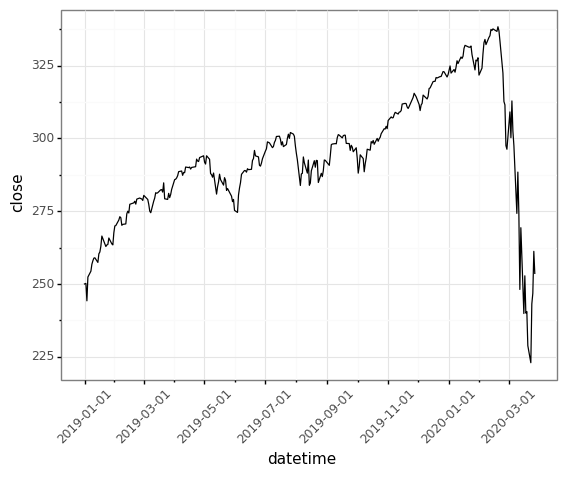

<ggplot: (306160837)>

In [8]:
(ggplot(spy_history, aes(x="datetime", y="close")) + 
 geom_line() + theme_bw() +
 theme(axis_text_x=element_text(angle=45)))
